## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [33]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [34]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path("../Week3ChallengeLab/Resources/bitstamp.csv"), 
    index_col='Timestamp', 
    infer_datetime_format=True, 
    parse_dates=True
)


### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [35]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE

bitstamp.head()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [36]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path("../Week3ChallengeLab/Resources/coinbase.csv"), 
    index_col='Timestamp', 
    infer_datetime_format=True, 
    parse_dates=True
)



In [37]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE

coinbase.head()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [38]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp.isnull().sum()
bitstamp = bitstamp.dropna()




### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [39]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.dtypes
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")


/Users/phoebegunter/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


### Step 3: Convert the data type of the Close column to a `float`.

In [40]:
# Convert the Close data type to a float
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("float")
bitstamp.dtypes


Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [31]:
# Review the data for duplicate values, and drop them if necessary

bitstamp.duplicated().sum()


0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [41]:
# Repeat Steps 1–4 for the coinbase DataFrame

coinbase.isnull().sum()

coinbase.dtypes
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "")

coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("float")
coinbase.dtypes
coinbase.duplicated().sum()


/Users/phoebegunter/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


217

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [70]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.iloc[:, [3]]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [78]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.iloc[:, [3]]


# Review the first five rows of the DataFrame
coinbase_sliced.tail()


,Close
Timestamp,
2018-03-31 23:55:00,6930.00
2018-03-31 23:56:00,6930.01
2018-03-31 23:57:00,6933.91
2018-03-31 23:58:00,6937.31
2018-03-31 23:59:00,6934.00


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [72]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()


,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [73]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()


,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitstamp Line Plot'}, xlabel='Timestamp'>

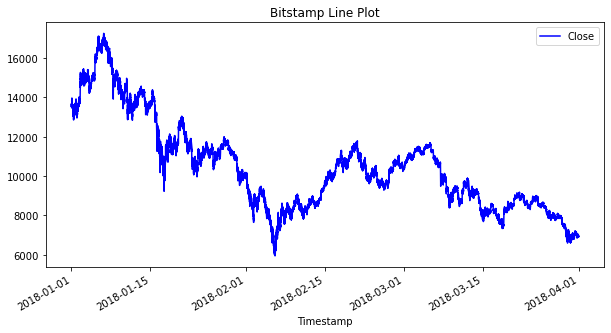

In [74]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(figsize=(10,5), title = "Bitstamp Line Plot", color = "blue")


<AxesSubplot:title={'center':'Coinbase Line Plot'}, xlabel='Timestamp'>

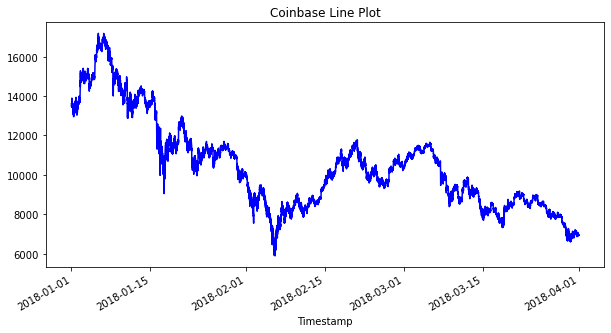

In [75]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced['Close'].plot(figsize=(10,5), title = "Coinbase Line Plot", color = "blue")


<AxesSubplot:title={'center':'Bitstamp v. Coinbase'}, xlabel='Timestamp'>

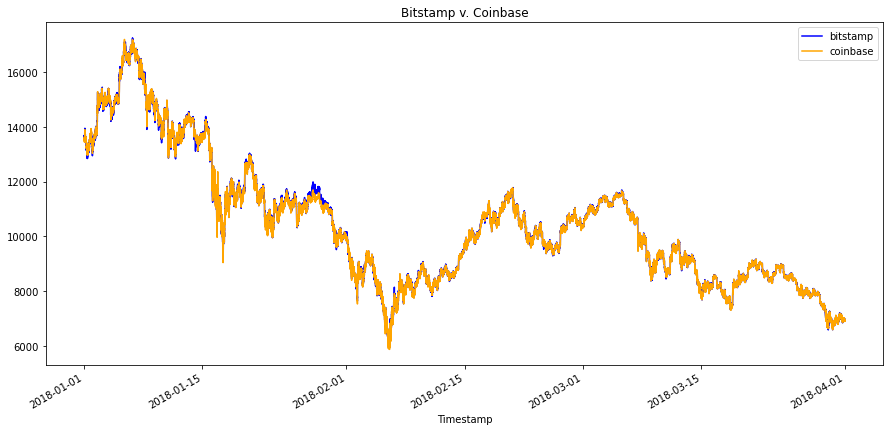

In [76]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE

bitstamp['Close'].plot(legend=True, figsize=(15, 7), title="Bitstamp v. Coinbase", color="blue", label="bitstamp")
coinbase['Close'].plot(legend=True, figsize=(15, 7), color="orange", label="coinbase")


<AxesSubplot:title={'center':'January 2018'}, xlabel='Timestamp'>

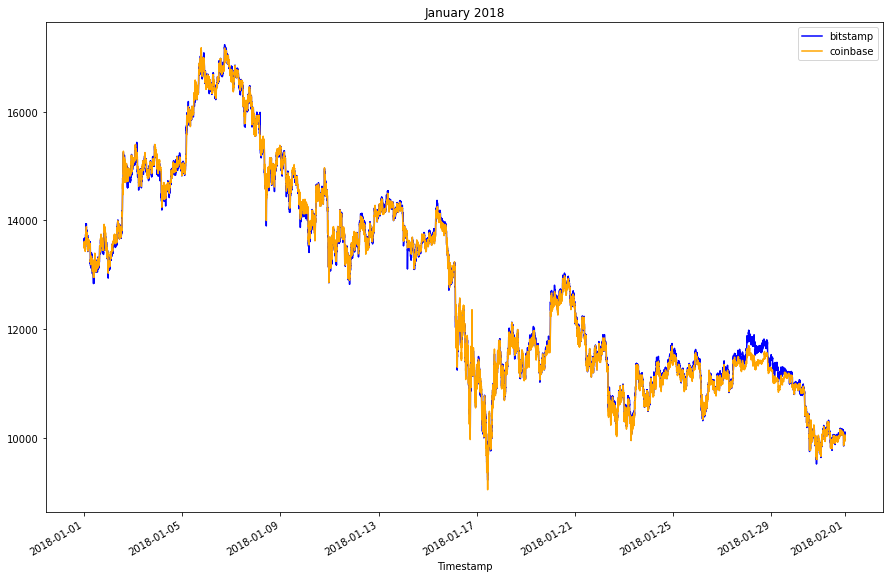

In [81]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp['Close'].loc['2018-01-01' : '2018-01-31'].plot(
    legend=True, figsize=(15, 10), title="January 2018", color="blue", label="bitstamp")
coinbase['Close'].loc['2018-01-01' : '2018-01-31'].plot(
    legend=True, figsize=(15, 10), color="orange", label="coinbase")



<AxesSubplot:title={'center':'March 2018'}, xlabel='Timestamp'>

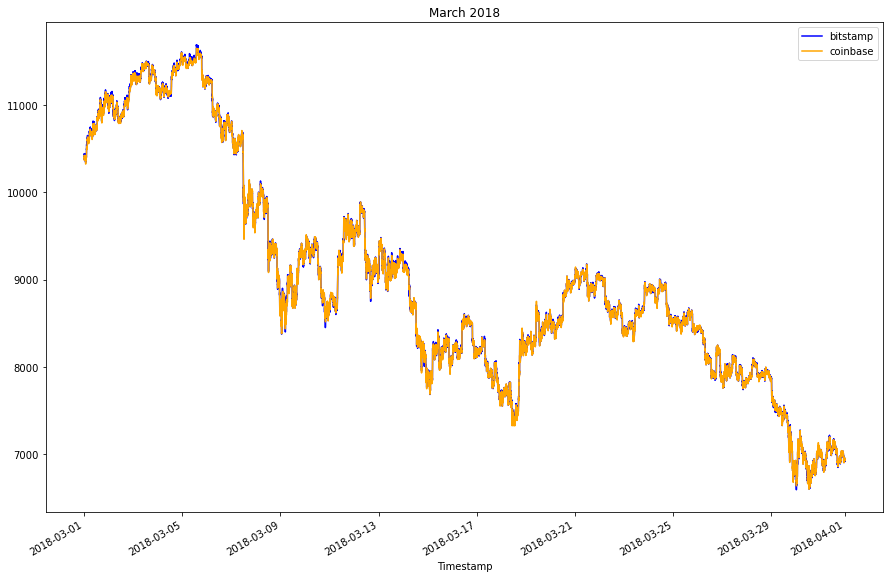

In [80]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 

bitstamp['Close'].loc['2018-03-01' : '2018-03-31'].plot(
    legend=True, figsize=(15, 10), title="March 2018", color="blue", label="bitstamp")
coinbase['Close'].loc['2018-03-01' : '2018-03-31'].plot(
    legend=True, figsize=(15, 10), color="orange", label="coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Yes, over time there is less spread change between coinbase and bitstamp. In January 2018 there were a few days at the end wehre the spread is quite visible. By March of 2018 ther is no noticeable spread.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Jan 1st 2018'}, xlabel='Timestamp'>

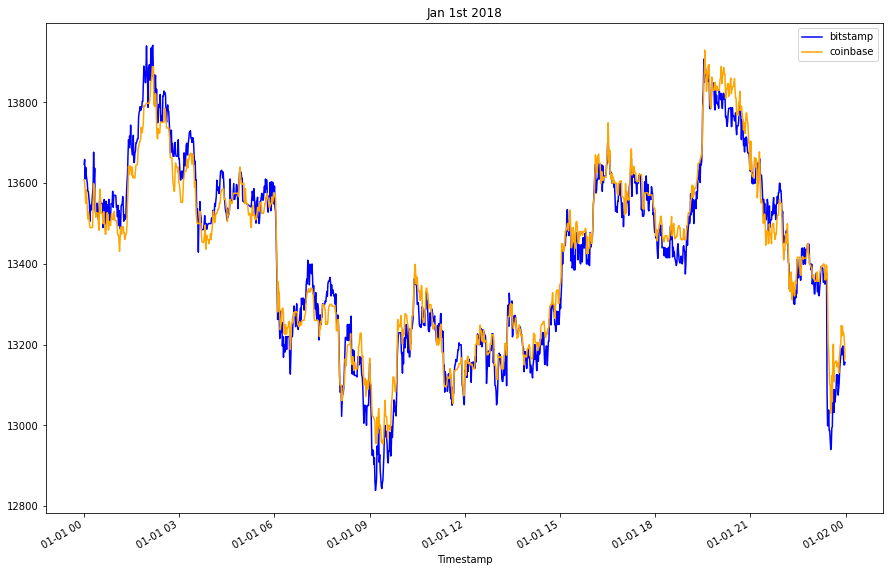

In [82]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

bitstamp['Close'].loc['2018-01-01'].plot(
    legend=True, figsize=(15, 10), title="Jan 1st 2018", color="blue", label="bitstamp")
coinbase['Close'].loc['2018-01-01'].plot(
    legend=True, figsize=(15, 10), color="orange", label="coinbase")




In [84]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp['Close'].loc['2018-01-01'] - coinbase['Close'].loc['2018-01-01']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1421.000000
mean       -5.767368
std        46.214511
min      -319.990000
25%       -36.000000
50%        -5.480000
75%        26.890000
max       142.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spead Early'}>

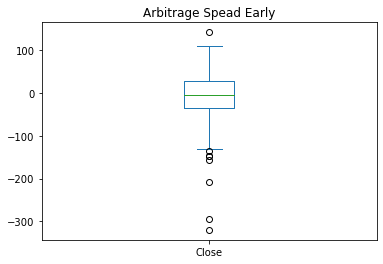

In [88]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind = 'box', title = "Arbitrage Spead Early")

<AxesSubplot:title={'center':'Feb 1st 2018'}, xlabel='Timestamp'>

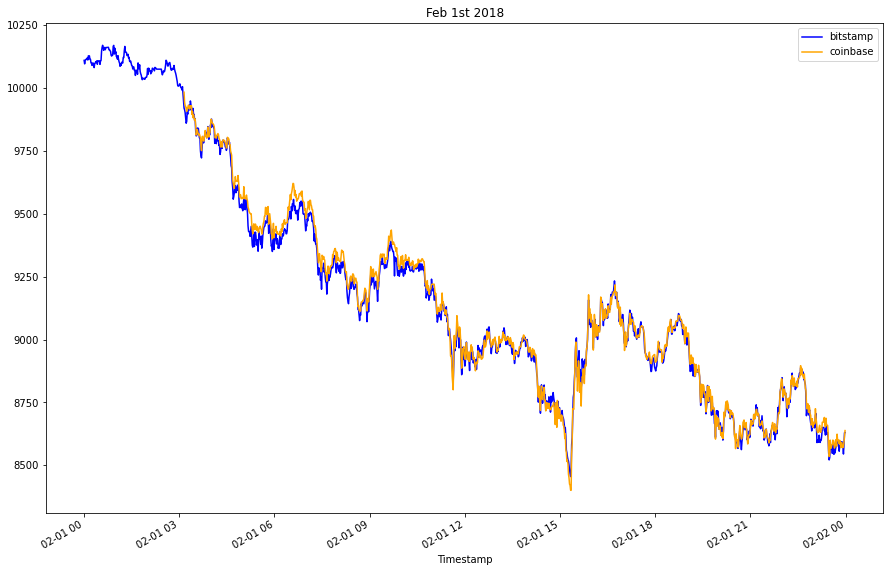

In [86]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-02-01'].plot(
    legend=True, figsize=(15, 10), title="Feb 1st 2018", color="blue", label="bitstamp")
coinbase['Close'].loc['2018-02-01'].plot(
    legend=True, figsize=(15, 10), color="orange", label="coinbase")



In [87]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle =  bitstamp['Close'].loc['2018-02-01'] - coinbase['Close'].loc['2018-02-01']

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1251.000000
mean      -13.956163
std        25.420642
min      -125.180000
25%       -30.795000
50%       -13.860000
75%         0.960000
max       115.930000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spead Middle'}>

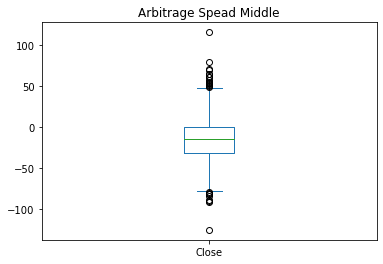

In [92]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind = 'box', title = "Arbitrage Spead Middle")



<AxesSubplot:title={'center':'March 1st 2018'}, xlabel='Timestamp'>

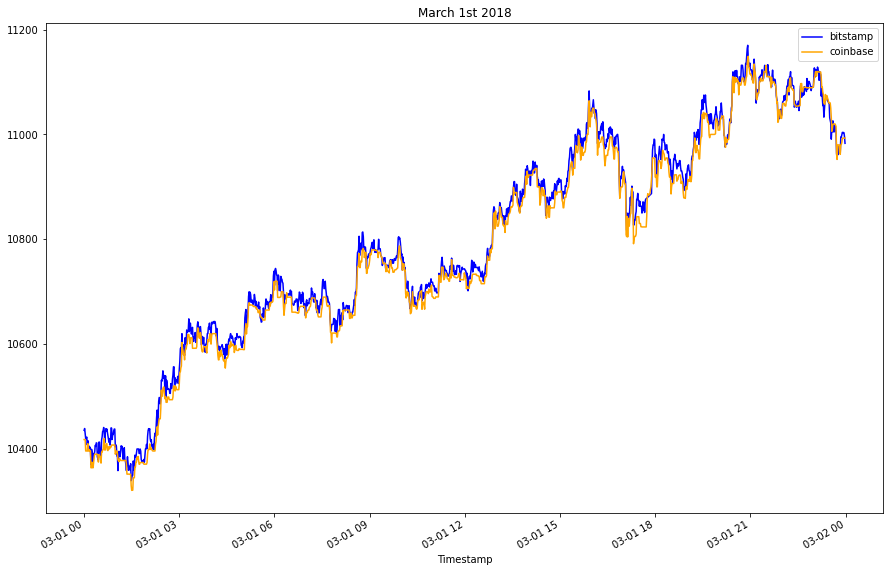

In [90]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-03-01'].plot(
    legend=True, figsize=(15, 10), title="March 1st 2018", color="blue", label="bitstamp")
coinbase['Close'].loc['2018-03-01'].plot(
    legend=True, figsize=(15, 10), color="orange", label="coinbase")

In [91]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp['Close'].loc['2018-03-01'] - coinbase['Close'].loc['2018-03-01']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()


count    1425.00000
mean       14.45527
std        12.52715
min       -41.10000
25%         6.12000
50%        14.48000
75%        22.87000
max        52.86000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spend Late'}>

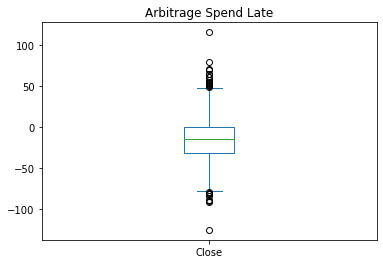

In [93]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_middle.plot(kind = 'box', title = "Arbitrage Spend Late")




### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [109]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase['Close'].loc['2018-01-01'] - bitstamp['Close'].loc['2018-01-01']


# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early.describe()



count    1421.000000
mean        5.767368
std        46.214511
min      -142.000000
25%       -26.890000
50%         5.480000
75%        36.000000
max       319.990000
Name: Close, dtype: float64

In [110]:
arbitrage_spread_middle = coinbase['Close'].loc['2018-02-01'] - bitstamp['Close'].loc['2018-02-01']
arbitrage_spread_middle.describe()


count    1251.000000
mean       13.956163
std        25.420642
min      -115.930000
25%        -0.960000
50%        13.860000
75%        30.795000
max       125.180000
Name: Close, dtype: float64

In [104]:
arbitrage_spread_late = bitstamp['Close'].loc['2018-03-01'] - coinbase['Close'].loc['2018-03-01']
arbitrage_spread_late.describe()

count    1425.00000
mean       14.45527
std        12.52715
min       -41.10000
25%         6.12000
50%        14.48000
75%        22.87000
max        52.86000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [112]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= arbitrage_spread_early[arbitrage_spread_early>0] / bitstamp['Close'].loc['2018-01-01']

# Review the spread return DataFrame
spread_return_early.tail()

Timestamp
2018-01-01 23:55:00    0.002673
2018-01-01 23:56:00    0.004239
2018-01-01 23:57:00    0.005579
2018-01-01 23:58:00    0.003959
2018-01-01 23:59:00    0.000677
Name: Close, dtype: float64

In [114]:
# For the date middle in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle= arbitrage_spread_middle[arbitrage_spread_middle>0] / bitstamp['Close'].loc['2018-02-01']

# Review the spread return DataFrame
spread_return_middle.tail()

Timestamp
2018-02-01 23:55:00         NaN
2018-02-01 23:56:00    0.003682
2018-02-01 23:57:00    0.001097
2018-02-01 23:58:00         NaN
2018-02-01 23:59:00    0.000912
Name: Close, dtype: float64

In [115]:
# For the date late in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late= arbitrage_spread_late[arbitrage_spread_late>0] / coinbase['Close'].loc['2018-03-01']

# Review the spread return DataFrame
spread_return_late.tail()

Timestamp
2018-03-01 23:55:00    0.000867
2018-03-01 23:56:00    0.000980
2018-03-01 23:57:00    0.000921
2018-03-01 23:58:00    0.000247
2018-03-01 23:59:00         NaN
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [116]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-01 09:10:00    0.011455
2018-01-01 23:25:00    0.022465
2018-01-01 23:26:00    0.024616
2018-01-01 23:27:00    0.015948
2018-01-01 23:28:00    0.011261
Name: Close, dtype: float64

In [118]:
# For the date middle in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

# Review the first five profitable trades
profitable_trades_middle.head()

Timestamp
2018-02-01 09:47:00    0.013529
Name: Close, dtype: float64

In [119]:
# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [120]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    7.000000
mean     0.015453
std      0.005833
min      0.010427
25%      0.011358
50%      0.012001
75%      0.019207
max      0.024616
Name: Close, dtype: float64

In [121]:
# For the date middle in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle.describe()

count    1.000000
mean     0.013529
std           NaN
min      0.013529
25%      0.013529
50%      0.013529
75%      0.013529
max      0.013529
Name: Close, dtype: float64

In [122]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [125]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * coinbase['Close'].loc['2018-01-01']
profit_early

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early.head()



Timestamp
2018-01-01 09:10:00    149.017663
2018-01-01 23:25:00    300.492303
2018-01-01 23:26:00    327.867031
2018-01-01 23:27:00    210.636595
2018-01-01 23:28:00    148.473307
Name: Close, dtype: float64

In [127]:
# For the date middle in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * coinbase['Close'].loc['2018-02-01']
profit_middle

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the middle profit DataFrame
profit_per_trade_middle.head()

Timestamp
2018-02-01 09:47:00    126.873539
Name: Close, dtype: float64

In [142]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * bitstamp['Close'].loc['2018-03-01']
profit_late

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the middle profit DataFrame
profit_per_trade_late.head()

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [130]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE

profit_per_trade_early.describe()



count      7.000000
mean     204.400981
std       79.044336
min      136.589476
25%      148.745485
50%      157.730492
75%      255.564449
max      327.867031
Name: Close, dtype: float64

In [131]:
profit_per_trade_middle.describe()


count      1.000000
mean     126.873539
std             NaN
min      126.873539
25%      126.873539
50%      126.873539
75%      126.873539
max      126.873539
Name: Close, dtype: float64

In [132]:
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade - Early Date'}, xlabel='Timestamp'>

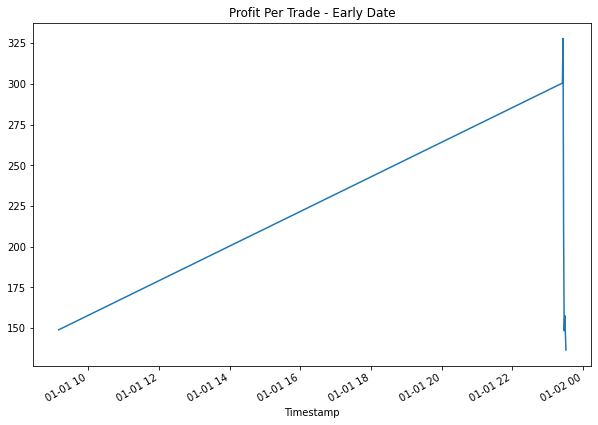

In [133]:
# Plot the results for the early profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_early.plot(figsize=(10, 7), title="Profit Per Trade - Early Date")


<AxesSubplot:title={'center':'Profit Per Trade - Middle Date'}, xlabel='Timestamp'>

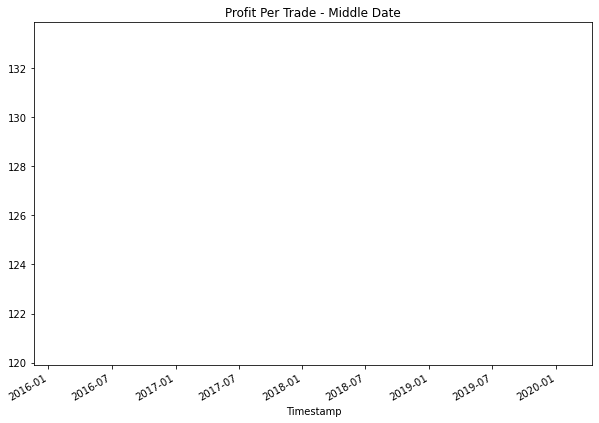

In [134]:
# Plot the results for the early profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_middle.plot(figsize=(10, 7), title="Profit Per Trade - Middle Date")


<AxesSubplot:title={'center':'Profit Per Trade - Late Date'}, xlabel='Timestamp'>

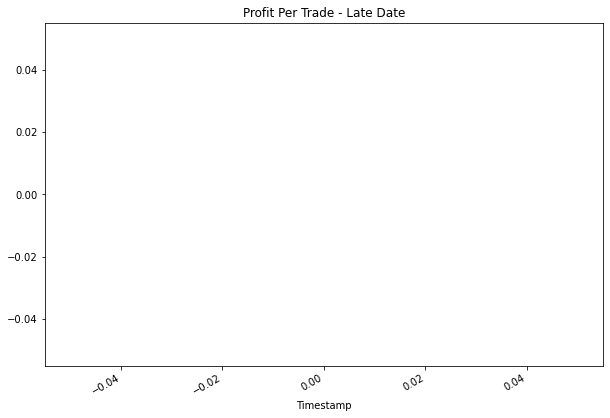

In [137]:
# Plot the results for the early profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_late.plot(figsize=(10, 7), title="Profit Per Trade - Late Date")


#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [138]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# YOUR CODE HERE

profit_sum_early = profit_per_trade_early.sum()
profit_sum_early



1430.8068661840703

In [144]:
profit_sum_middle = profit_per_trade_middle.sum()
profit_sum_middle

126.8735394252356

In [143]:
profit_sum_late = profit_per_trade_late.sum()
profit_sum_late

0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [146]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()




In [150]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()


In [151]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()


<AxesSubplot:title={'center':'Cumulative Bitcoin Profits - Early Date'}, xlabel='Timestamp'>

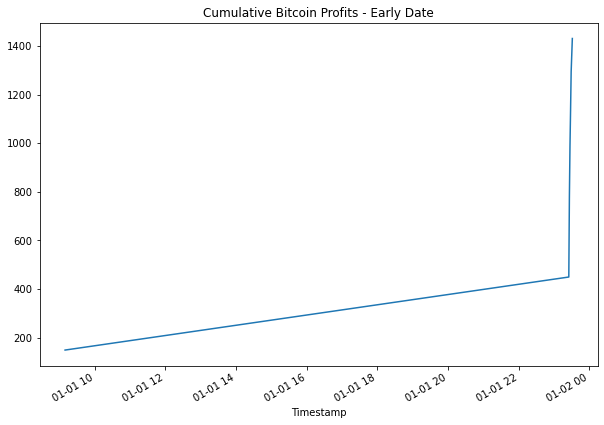

In [148]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame

cumulative_profit_early.plot(figsize=(10, 7), title="Cumulative Bitcoin Profits - Early Date")

<AxesSubplot:title={'center':'Cumulative Bitcoin Profits - Middle Date'}, xlabel='Timestamp'>

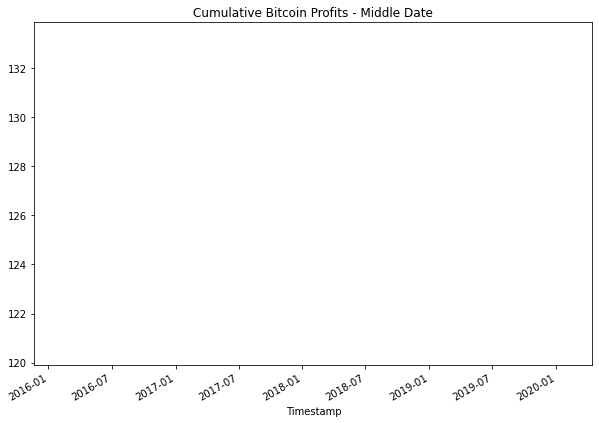

In [152]:
# Plot the cumulative sum of profits for the middle profit per trade DataFrame

cumulative_profit_middle.plot(figsize=(10, 7), title="Cumulative Bitcoin Profits - Middle Date")

<AxesSubplot:title={'center':'Cumulative Bitcoin Profits - late Date'}, xlabel='Timestamp'>

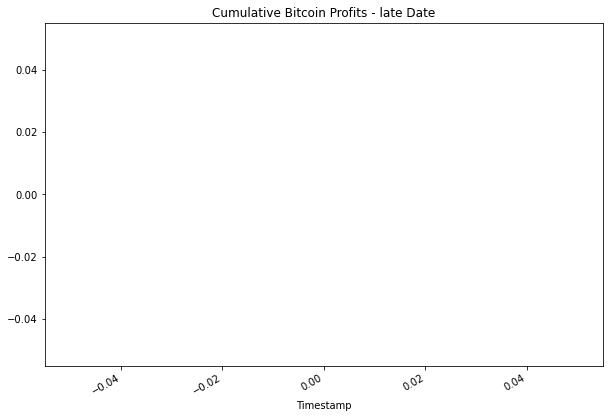

In [153]:
# Plot the cumulative sum of profits for the late profit per trade DataFrame

cumulative_profit_late.plot(figsize=(10, 7), title="Cumulative Bitcoin Profits - late Date")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Yes, as they year 2018 progressed, the ar